<a href="https://colab.research.google.com/github/ankit-genzeon/AI-ML-Bootcamp-Genzeon-2023/blob/master/Malaria_Outbreak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
Dataset = '/content/drive/MyDrive/Colab Notebooks/DataSet/outbreak_detect.csv'
df= pd.read_csv(Dataset)


In [6]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      23 non-null     int64  
 1   minTemp      23 non-null     int64  
 2   avgHumidity  23 non-null     float64
 3   Rainfall     23 non-null     float64
 4   Positive     23 non-null     int64  
 5   pf           23 non-null     int64  
 6   Outbreak     23 non-null     object 
dtypes: float64(2), int64(4), object(1)
memory usage: 1.4+ KB


,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,34.869565,23.956522,67.660435,6.499130,7724.130435,403.260870
std,4.515673,2.930688,15.305063,9.708999,3795.637559,230.225032
min,29.000000,18.000000,34.740000,0.000000,416.000000,26.000000
25%,31.500000,23.000000,55.450000,0.000000,4668.000000,212.500000
50%,34.000000,24.000000,72.780000,3.120000,9041.000000,404.000000
75%,37.500000,24.500000,79.885000,8.135000,10799.000000,580.500000
max,45.000000,32.000000,88.770000,41.400000,13154.000000,838.000000


In [7]:
df.columns

Index(['maxTemp', 'minTemp', 'avgHumidity', 'Rainfall', 'Positive', 'pf',
       'Outbreak'],
      dtype='object')

In [8]:
df.shape

(23, 7)

In [ ]:
#DATA VISULAISATION

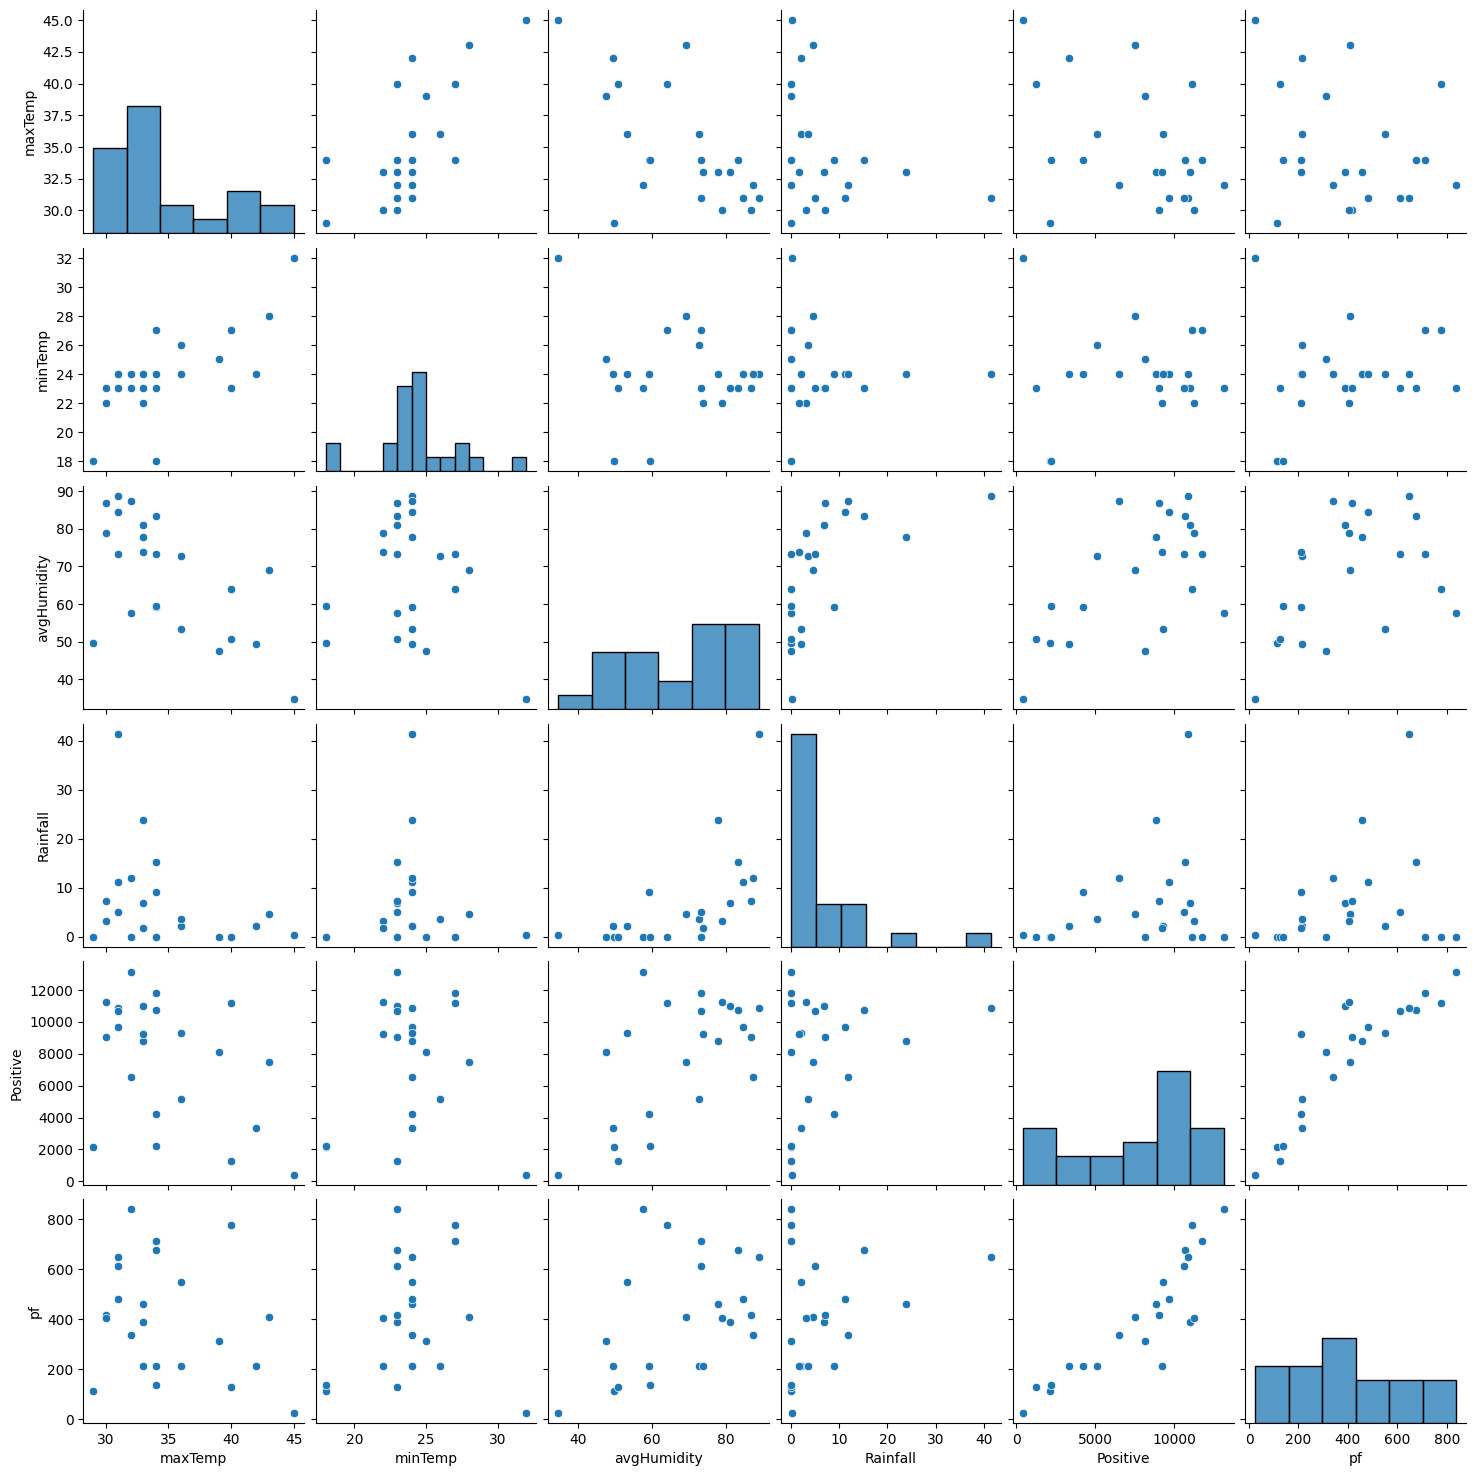

In [10]:
import seaborn as sns
sns.pairplot(df)

<ipython-input-11-36e34a8018c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()  # Calculate the correlation matrix


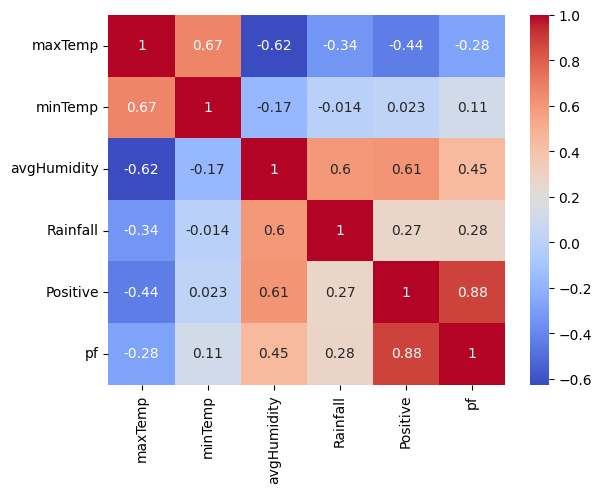

In [11]:
# Correlation Analysis
correlation_matrix = df.corr()  # Calculate the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Create a heatmap of the correlation matrix
plt.show()

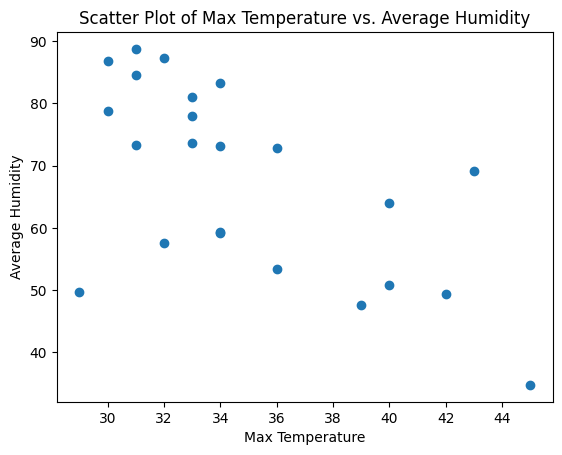

In [12]:
import matplotlib.pyplot as plt

plt.scatter(df['maxTemp'], df['avgHumidity'])
plt.xlabel('Max Temperature')
plt.ylabel('Average Humidity')
plt.title('Scatter Plot of Max Temperature vs. Average Humidity')
plt.show()


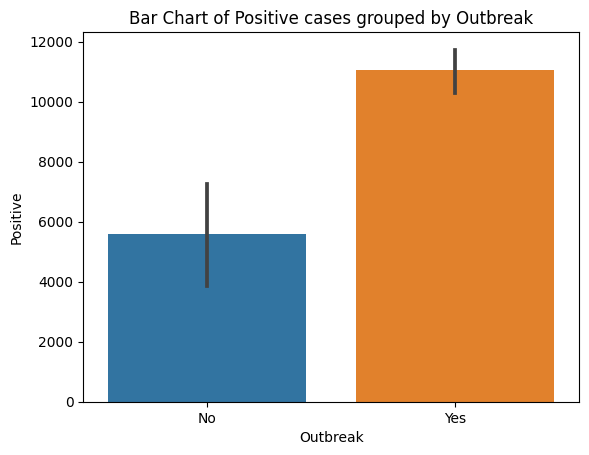

In [13]:
import seaborn as sns

sns.barplot(x='Outbreak', y='Positive', data=df)
plt.xlabel('Outbreak')
plt.ylabel('Positive')
plt.title('Bar Chart of Positive cases grouped by Outbreak')
plt.show()


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

# Impute missing values using mean (for numerical variables)
imputer = SimpleImputer(strategy='mean')
df['Rainfall'] = imputer.fit_transform(df[['Rainfall']])

In [20]:
# Label Encoding
label_encoder = LabelEncoder()
df['Outbreak'] = label_encoder.fit_transform(df['Outbreak'])



In [34]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop('Outbreak', axis=1)
y = df['Outbreak']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling and Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [22]:
# from imblearn.over_sampling import SMOTE

# # Apply SMOTE
# smote = SMOTE()
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
classification_report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 80.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5

Confusion Matrix:
 [[3 1]
 [0 1]]


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = {
    'maxTemp': [29, 34, 40, 34, 34, 31, 33, 31, 36, 32, 34, 42, 45, 43, 33, 32, 40, 39, 36, 31, 30, 30, 33],
    'minTemp': [18, 23, 23, 24, 27, 24, 24, 24, 24, 23, 18, 24, 32, 28, 23, 24, 27, 25, 26, 23, 23, 22, 22],
    'avgHumidity': [49.74, 83.27, 50.74, 59.16, 73.23, 88.77, 77.94, 84.57, 53.4, 57.5, 59.4, 49.43, 34.74, 69.07, 80.97, 87.32, 63.97, 47.52, 72.78, 73.35, 86.81, 78.8, 73.71],
    'Rainfall': [0, 15.22, 0, 9.06, 0, 41.4, 23.88, 11.15, 2.12, 0, 0, 2.19, 0.38, 4.65, 6.92, 11.92, 0, 0, 3.54, 4.97, 7.21, 3.12, 1.75],
    'Positive': [2156, 10717, 1257, 4198, 11808, 10881, 8830, 9693, 9310, 13154, 2197, 3362, 416, 7514, 10990, 6536, 11169, 8131, 5138, 10659, 9041, 11265, 9233],
    'pf': [112, 677, 127, 211, 712, 648, 459, 482, 549, 838, 136, 213, 26, 410, 390, 338, 776, 312, 213, 612, 418, 404, 212],
    'Outbreak': ['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Preprocessing
# Convert the 'Outbreak' column to numeric values
df['Outbreak'] = df['Outbreak'].map({'No': 0, 'Yes': 1})

# Split the dataset into training and testing sets
X = df.drop('Outbreak', axis=1)
y = df['Outbreak']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8


In [26]:
# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.50      1.00      0.67         1

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5

Confusion Matrix:
 [[3 1]
 [0 1]]
